(243, 15)

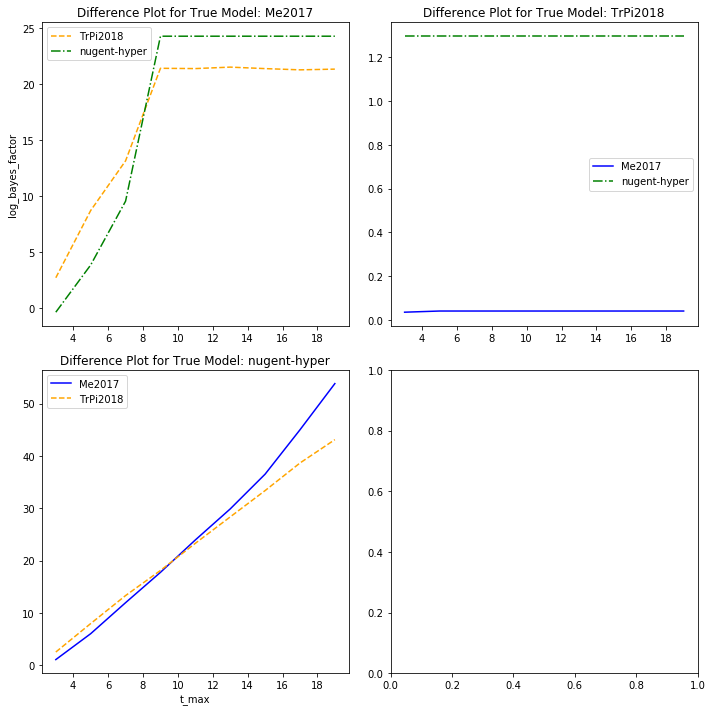

In [2]:
import os
import json
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='once')
import warnings
warnings.simplefilter('ignore', category=FutureWarning)

df = pd.read_csv('./fit_df.csv')
# df21 = pd.read_csv('./21-validation-fit_df.csv')
# df = pd.concat([df, df21], ignore_index=True)

display(df.shape)

grouped_df = df.groupby(['t_max', 'fit_model', 'true_model']).agg({'log_bayes_factor': 'median'}).reset_index()
ls_dict = {model:value for model, value in zip(grouped_df['fit_model'].unique(), ['-', '--', '-.', ':'])}
color_dict = {model:value for model, value in zip(grouped_df['fit_model'].unique(), ['blue', 'orange', 'green', 'red'])}

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()
for axi, model in enumerate(grouped_df['true_model'].unique()):
    iter_df = grouped_df[grouped_df['true_model'] == model]
    
    ax = axs[axi]
    for fit_model in grouped_df['true_model'].unique():
        if fit_model != model:
            diff_df = grouped_df[(grouped_df['true_model'] == model) & (grouped_df['fit_model'] == fit_model)]
            diff =(grouped_df[(grouped_df['true_model'] == model) & (grouped_df['fit_model'] == model)]['log_bayes_factor'].values[0] - diff_df['log_bayes_factor'] )
            ax.plot(diff_df['t_max'], diff, label=f'{fit_model}', linestyle=ls_dict[fit_model], color=color_dict[fit_model])

    ax.set_title(f'Difference Plot for True Model: {model}')

    ax.legend()
axs[0].set_ylabel('log_bayes_factor')
axs[2].set_xlabel('t_max')
plt.tight_layout()
plt.show()